# Basic Usage of the OSM-flex module

The basic usage consists in two parts:
1. Downloading data dumps (osm.pbf files) containing all map data of an area
    * Countries
    * Regions
    * Planet
2. Extracting specific data into tabular format (geopandas dataframes) from these data dumps
    * With pre-written wrappers for some infrastructure classes
    * Using any tag syntax from OSM

In [1]:
# Loading necessary data packages
import matplotlib.pyplot as plt

import sys
sys.path.append('your-path-to/osm-flex/src') 

import osm_flex.download as dl
import osm_flex.extract as ex
import osm_flex.config
import osm_flex.clip as cp

### Step 1: Downloading data dumps

Per default, an `osm/osm_bpf` folder is created in your home directory, and all data dumps are downloaded to this path. Thise can be changed in the `osm_flex.config` module by modifying the variable `OSM_DATA_DIR`

Download the Switzerland country file from download.geofabrik.de to `~/osm/osm_bpf/switzerland-latest.osm.pbf`

In [2]:
iso3 = 'CHE'
dl.get_country_geofabrik(iso3)

Download Central America regional file from geofabrik to`~/osm/osm_bpf/central-america-latest.osm.pbf` folder

In [3]:
region = 'central-america'
dl.get_region_geofabrik(region)

### Step 2: Extracting geospatial data

Using pre-written wrappers for certain critical infrastructure types (check which ones are available), with the method `extract_cis`. They can be further configured in the `DICT_CIS_OSM` dictionary located in the config file 

In [4]:
# available wrapper categories:
osm_flex.config.DICT_CIS_OSM.keys()

dict_keys(['education', 'healthcare', 'water', 'telecom', 'road', 'main_road', 'rail', 'air', 'gas', 'oil', 'power', 'wastewater', 'food', 'buildings'])

In [5]:
# check the signature of the extraction function
? ex.extract_cis

In [6]:
path_che_dump = osm_flex.config.OSM_DATA_DIR.joinpath('switzerland-latest.osm.pbf')
gdf_che_mainroad = ex.extract_cis(path_che_dump, 'main_road')

extract points: 0it [00:07, ?it/s]
extract lines: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117861/117861 [00:16<00:00, 7217.83it/s]


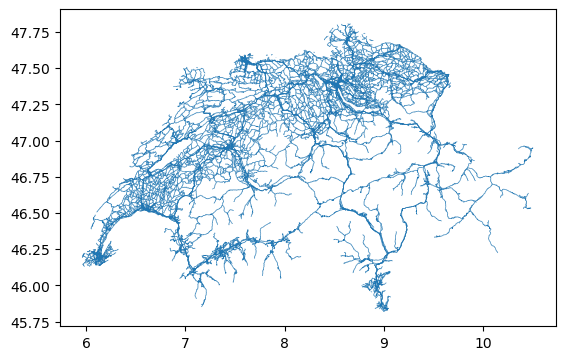

In [12]:
fig, ax = plt.subplots()
gdf_che_mainroad.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Switzerland')
plt.show()

Using key and value tags from OSM (check [https://taginfo.openstreetmap.org/]) with the method `extract`

In [15]:
path_ca_dump = osm_flex.config.OSM_DATA_DIR.joinpath('central-america-latest.osm.pbf')
gdf_ca_forest = ex.extract(path_ca_dump,'multipolygons',
                            ['landuse', 'name'], 
                            "landuse='forest'")

Warning 1: Non closed ring detected. To avoid accepting it, set the OGR_GEOMETRY_ACCEPT_UNCLOSED_RING configuration option to NO
extract multipolygons: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7578/7578 [01:34<00:00, 80.03it/s]


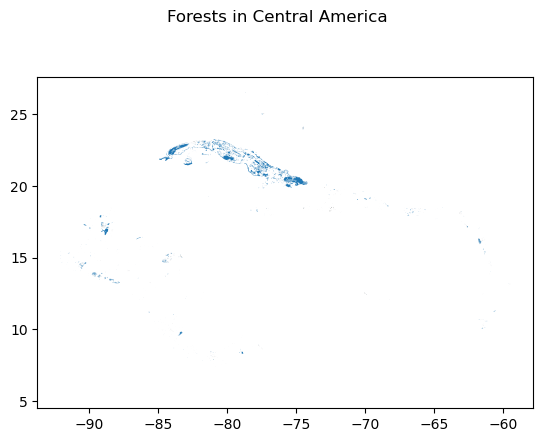

In [16]:
fig, ax = plt.subplots()
gdf_ca_forest.plot(ax=ax)
fig.suptitle('Forests in Central America')
plt.show()

### Optional Step: Clipping data

For custom data dumps, the planet, regional or country files can be clipped (=cut) to a user-defined geographical extent, and saved as new osm.pbf file. Instructions can be found in tutorial 1_clipping_shapes.